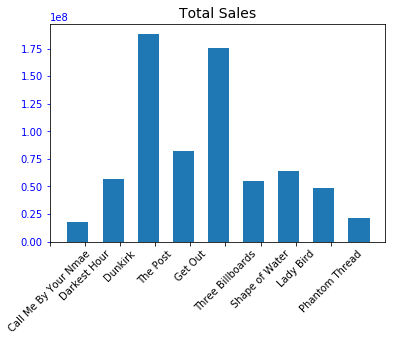

In [9]:
%matplotlib inline
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


total_sales = pd.read_csv('totally.csv')

fig, ax1 = plt.subplots()

ax1.bar(total_sales.index, total_sales['total_sales'], width = 0.6)
ax1.set_title('Total Sales', fontsize = 14)
ax1.tick_params('y', colors='b')
ax1.set_xticks(ticks=total_sales.index-0.8)
ax1.set_xticklabels((total_sales['movie']), rotation = 45)
plt.show()



In [21]:
%matplotlib inline
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


conn3 = sqlite3.connect('twitterDunkirk.db')
c3 = conn.cursor()
dunkirk = pd.read_sql('select * from sentiment', conn3)

dunkirk.tail()

,date,tweet,sentiment
4609,2017-11-12 19:11:09,Saw it once and theatres and saw it again when...,0.7841
4610,2017-11-12 19:08:07,"""It's stripped down to bare essentials."" Paul ...",0.3182
4611,2017-11-12 19:06:08,"Just watched the amazing film ""Dunkirk"" at the...",0.6486
4612,2017-11-12 19:04:21,Going through a WWII phase. @HBO Band of broth...,0.8360
4613,2017-11-12 19:00:36,Best picture:\n\n1) Three Billboards\n2) The P...,0.1531


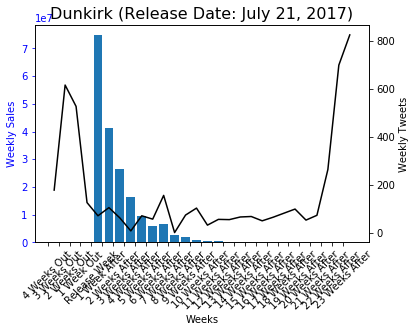

In [22]:
# this file contains all the weekly sales info
weekly_track = pd.read_csv('weeklysales.csv')

# we convert the date from string to date format
dunkirk['date'] = pd.to_datetime(dunkirk['date'])
dunkirk.sort_values('date', inplace = True)
dunkirk.set_index('date', inplace=True)

# resample the data to weekly granularity
weekly_tweets = dunkirk.resample('w').size()
weekly_sentiment = dunkirk.sentiment.resample('w').mean()

# print(weekly_sentiment)
weekly_sales = weekly_track['dunkirk']

adjusted = []
for item in weekly_sales:
    adjusted.append(int(item))
    if len(adjusted) == len(weekly_tweets):
        break
# print(len(weekly_sales), len(weekly_sentiment), len(weekly_tweets))
# this is the new weekly dataframe
weekly = pd.DataFrame({'dates': weekly_tweets.index,'tweet_count': weekly_tweets.values,
                      'sentiment': weekly_sentiment.values, 'sales': adjusted})

# print(weekly.head())
fig, ax1 = plt.subplots()
ax1.bar(weekly.index, weekly['sales'])
ax1.set_title("Dunkirk (Release Date: July 21, 2017)", fontsize = 16)
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(ticks=weekly.index-0.6)
ax1.set_xticklabels(labels=( "4 Weeks Out", "3 Weeks Out", "2 Weeks Out", "1 Week Out", " Release Week",
              "1 Week After", "2 Weeks After","3 Weeks After","4 Weeks After","5 Weeks After","6 Weeks After","7 Weeks After",
              "8 Weeks After","9 Weeks After","10 Weeks After","11 Weeks After","12 Weeks After","13 Weeks After","14 Weeks After",
               "15 Weeks After","16 Weeks After","17 Weeks After","18 Weeks After","19 Weeks After","20 Weeks After","21 Weeks After",
                "22 Weeks After","23 Weeks After","24 Weeks After","25 Weeks After","26 Weeks After","27 Weeks After",
                "28 Weeks After", "29 Weeks After"), rotation=45, size="medium" )
ax2 = ax1.twinx()
ax2.plot(weekly.index, weekly['tweet_count'],'k-')
ax2.set_ylabel('Weekly Tweets', color='k')
plt.show()

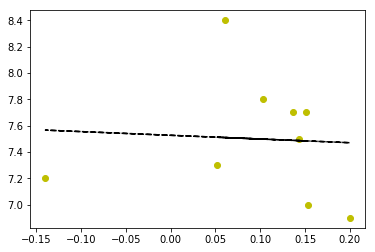

In [26]:
# in this section, we try to find any possibel correlation between the sentiment and rating scores

import numpy as np

weekly_data = pd.read_csv('weeklt_data.csv')
ratings = pd.read_csv('ratings.csv')

m_names = ["ladyb", "thepost", "threebill", "shapeofwater", "phantom", "getout", "dunkirk", "darkest", "callme"]

threebill = weekly_data[weekly_data['movie']== 'threebill']
ladyb = weekly_data[weekly_data['movie']== 'ladyb']
thepost = weekly_data[weekly_data['movie']== 'thepost']
shapeofwater = weekly_data[weekly_data['movie']== 'shapeofwater']
phantom = weekly_data[weekly_data['movie']== 'phantom']
getout = weekly_data[weekly_data['movie']== 'getout']
dunkirk = weekly_data[weekly_data['movie']== 'dunkirk']
darkest = weekly_data[weekly_data['movie']== 'darkest']
callme = weekly_data[weekly_data['movie']== 'callme']

list_x = [callme['sentiment'].mean(), darkest['sentiment'].mean(), dunkirk['sentiment'].mean(), thepost['sentiment'].mean()
        , getout['sentiment'].mean(), threebill['sentiment'].mean(), shapeofwater['sentiment'].mean(), 
         ladyb['sentiment'].mean(), phantom['sentiment'].mean()]
list_y = ratings['rating']

fit = np.polyfit(list_x,list_y,1)
fit_fn = np.poly1d(fit)
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(list_x,list_y, 'yo', list_x, fit_fn(list_x), '--k')

plt.show()